# Support Vector Machines
The Data has already been processed earlier. 
So I will use what I have

In [33]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from openpyxl import Workbook
pd.options.display.float_format = '{:.2f}'.format

In [2]:
os.getcwd()
os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')
X1=pd.read_csv(os.getcwd()+ '/X1.csv')
X2=pd.read_csv(os.getcwd()+ '/X2.csv')
from sklearn.utils import shuffle
X1 = shuffle(X1)
X2=shuffle(X2)
y_train=X1['Data_x'].reset_index(drop=True) # Separating all of the data
y_test=X2['Data_x'].reset_index(drop=True)
X_train = X1.iloc[:,3: ]
X_test = X2.iloc[:,3: ]

In [3]:
X_train

,GERCB,HLRCV,LORCB,NGRCV,PERCV,PQRCB,PQRCP,PQRCV,SORCB,SOTXB,TERCB,TERCV,TNRCB,TNRSB,WDRCV,StateCode,Year1
2075,265.0,135.8,220440.0,423.5,631.0,0.0,0.0,0.0,19.0,19.0,362504.0,3118.1,142064.0,139457.0,10.3,40,35
1335,0.0,13.0,24084.0,50.0,83.2,0.0,0.0,0.0,0.0,0.0,68676.0,167.6,44592.0,39291.0,1.8,26,9
1134,0.0,126.8,171647.0,1718.6,2212.4,0.0,0.0,0.0,0.0,0.0,711880.0,3609.6,540233.0,504236.0,28.3,22,12
2293,96.0,66.7,64259.0,593.8,683.7,3054.0,795.0,66.7,3283.0,4150.0,187847.0,1696.7,123588.0,117743.0,20.5,44,49
2407,0.0,18.1,200369.0,158.0,340.5,0.0,0.0,0.0,0.0,0.0,348104.0,804.3,147735.0,141036.0,12.6,47,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,0.0,24.6,18819.0,95.2,128.2,0.0,0.0,0.0,0.0,0.0,61718.0,297.6,42899.0,38239.0,2.8,32,11
1107,13.0,81.7,16449.0,17.6,1012.3,0.0,0.0,0.0,109.0,109.0,91984.0,1612.8,75535.0,73303.0,20.5,21,36
879,0.0,55.3,110497.0,302.1,445.0,0.0,0.0,0.0,0.0,0.0,263998.0,1203.7,153501.0,133898.0,22.0,17,12
1313,22.0,235.4,128572.0,332.8,591.0,0.0,0.0,0.0,12.0,12.0,228469.0,2492.5,99897.0,96632.0,22.2,25,38


In [4]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
y_pred=regr.fit(X_train, y_train).predict(X_test)

In [5]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(1)


,true,predicted,how_off
0,616.5,977.924866,-58.625282


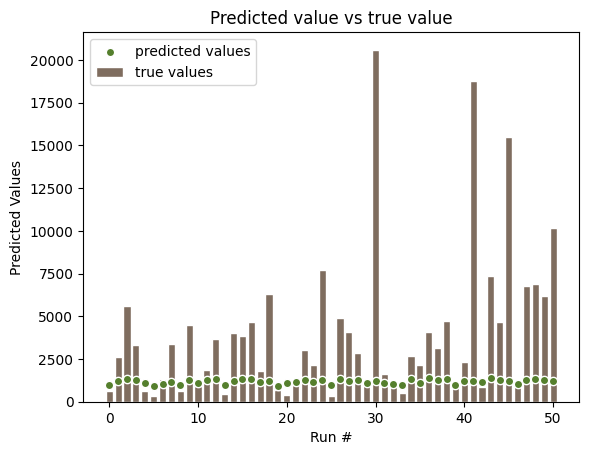

In [6]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

# Parameter Optimazation

In [7]:
#Gridsearch is being slow even with minimum params set. So I wil do this the old fashioned way.


In [36]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(StandardScaler(), SVR(C=i, epsilon=0.2))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T

In [39]:
pqr=pqr.rename(index={0:'Mean Absolute error',1:'Mean Squared error',2:'explained variance',3:'r_2 score'})

Going to use 

In [40]:
pqr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Mean Absolute error,2957.51,2792.97,2668.64,2572.99,2492.08,2429.53,2375.58,2321.06,2278.06,2235.52,2200.26,2170.31,2141.14,2112.25,2084.62,2055.50,2032.23,2011.19,1991.73
Mean Squared error,25384127.52,23871450.82,22780424.66,21903785.80,21147071.61,20601187.44,20141386.39,19694202.68,19352235.38,19008309.65,18712479.71,18464580.07,18242558.35,18007064.25,17809060.63,17590235.98,17435750.07,17301447.61,17182899.08
explained variance,0.03,0.05,0.06,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.17,0.18,0.19,0.19,0.20,0.20
r_2 score,-0.39,-0.31,-0.25,-0.20,-0.16,-0.13,-0.10,-0.08,-0.06,-0.04,-0.02,-0.01,0.00,0.02,0.03,0.04,0.05,0.05,0.06


In [29]:
min(pqr.abs().min())

TypeError: bad operand type for abs(): 'str'

In [10]:
#Now we have some X_vales
shorter1=pd.DataFrame(abc).T
shorter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       51 non-null     float64
 1   1       51 non-null     float64
 2   2       51 non-null     float64
 3   3       51 non-null     float64
 4   4       51 non-null     float64
 5   5       51 non-null     float64
 6   6       51 non-null     float64
 7   7       51 non-null     float64
 8   8       51 non-null     float64
 9   9       51 non-null     float64
 10  10      51 non-null     float64
 11  11      51 non-null     float64
 12  12      51 non-null     float64
 13  13      51 non-null     float64
 14  14      51 non-null     float64
 15  15      51 non-null     float64
 16  16      51 non-null     float64
 17  17      51 non-null     float64
 18  18      51 non-null     float64
dtypes: float64(19)
memory usage: 7.7 KB


In [11]:
#Now we have some X_vales
shorter1=pd.DataFrame(abc).T
#shorter1.to_excel('Math.xlsx')
[shorter1.insert(i,'true',results_trial1['true'], allow_duplicates=True) for i in range(shorter1.shape[1], 0, -1)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
abc=[]
m=20
for i in range(1,m+1):
    abc.append(i)

In [13]:
shorter1

,0,true,1,true,2,true,3,true,4,true,...,14,true,15,true,16,true,17,true,18,true
0,977.924866,616.5,1000.966953,616.5,1011.901272,616.5,1041.807045,616.5,1073.371827,616.5,...,1012.704489,616.5,1002.114831,616.5,988.939277,616.5,973.315927,616.5,956.930944,616.5
1,1209.016141,2612.4,1436.591238,2612.4,1603.791976,2612.4,1730.084159,2612.4,1838.919083,2612.4,...,2140.125959,2612.4,2158.560980,2612.4,2170.977791,2612.4,2179.487874,2612.4,2186.766403,2612.4
2,1354.670369,5579.6,1714.778038,5579.6,1997.022848,5579.6,2224.784304,5579.6,2431.113216,5579.6,...,3385.548254,5579.6,3450.094203,5579.6,3502.315791,5579.6,3548.640491,5579.6,3589.084242,5579.6
3,1253.895863,3320.2,1524.816233,3320.2,1735.205904,3320.2,1916.575453,3320.2,2089.070828,3320.2,...,2880.779017,3320.2,2916.882448,3320.2,2936.756210,3320.2,2951.130071,3320.2,2952.200953,3320.2
4,1122.673583,623.9,1274.772808,623.9,1382.010153,623.9,1466.177842,623.9,1532.728316,623.9,...,1466.146066,623.9,1445.007229,623.9,1417.596123,623.9,1393.711494,623.9,1367.176790,623.9
5,920.101118,330.9,918.081543,330.9,910.028444,330.9,938.159825,330.9,963.895290,330.9,...,979.789015,330.9,976.083957,330.9,970.333040,330.9,961.490923,330.9,952.763581,330.9
6,1034.501750,1343.2,1104.102924,1343.2,1156.126200,1343.2,1214.212482,1343.2,1267.704514,1343.2,...,1268.063889,1343.2,1262.614391,1343.2,1252.621584,1343.2,1240.955426,1343.2,1228.471340,1343.2
7,1150.156916,3351.6,1345.927134,3351.6,1494.763080,3351.6,1623.474666,3351.6,1718.839563,3351.6,...,2098.913903,3351.6,2129.028251,3351.6,2155.529818,3351.6,2174.204229,3351.6,2196.124676,3351.6
8,971.540967,647.1,1011.316443,647.1,1031.731372,647.1,1070.919817,647.1,1100.117420,647.1,...,1073.608762,647.1,1065.163405,647.1,1055.016242,647.1,1043.166077,647.1,1031.817398,647.1
9,1293.249896,4476.5,1600.839302,4476.5,1840.149923,4476.5,2041.499583,4476.5,2221.782542,4476.5,...,3089.777569,4476.5,3146.356030,4476.5,3189.094771,4476.5,3233.099766,4476.5,3273.234089,4476.5


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (51,) and arg 1 with shape (51, 19).

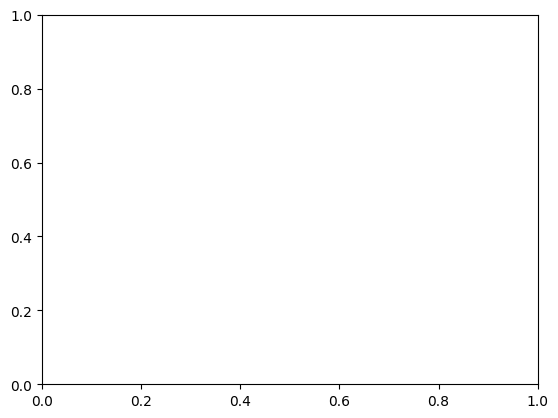

In [14]:
for i in abc:
	r1 = np.arange(len(shorter1['true']))

	plt.bar(r1, shorter1['true'], color='#7f6d5f', edgecolor='white', label='true values')
	plt.scatter(r1, shorter1[i], color='#557f2d', edgecolor='white', label='predicted values')
	plt.xlabel('Run #')
	plt.ylabel('Predicted Values')
	plt.title('Predicted value vs true value')
